### Images are cropped in 4 different sizes for alternative approach

In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
#from PIL import Image causing problems in colab
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/MLforphysicist'
root_path2 = 'gdrive/My\ Drive/MLforphysicist'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# choose witch dataset will be cropped (train, eval, test)
choose_csv = "test"
csv_path = root_path+"/image_dataset/{}_labels.csv".format(choose_csv)
type_dict = {"filename": np.str, "xmin": np.int64, "ymin": np.int64, "xmax": np.int64, "ymax": np.int64, "class": np.str}
#print(type_dict)
df = pd.read_csv(csv_path, encoding='utf-8', engine='c', header=0, dtype=type_dict)
print(df)

                                              filename  xmin  ...  ymax  class
0    RecFile_1_20181011_153137_pointgrey_flycapture...   875  ...   546      A
1    RecFile_1_20190124_111149_pointgrey_flycapture...   807  ...   370    ID3
2    RecFile_7_20180111_100948_pointgrey_flycapture...  1411  ...   640      A
3    RecFile_1_20190124_112608_pointgrey_flycapture...  1152  ...  1257      C
4    RecFile_7_20171109_114509_pointgrey_flycapture...   711  ...    96      C
..                                                 ...   ...  ...   ...    ...
495  RecFile_1_20190124_111118_pointgrey_flycapture...   901  ...   701      C
496  RecFile_7_20171109_114509_pointgrey_flycapture...   709  ...    97      C
497  RecFile_1_20190124_101053_pointgrey_flycapture...   561  ...   758      F
498  RecFile_7_20180111_100948_pointgrey_flycapture...   202  ...   496      C
499  RecFile_7_20171109_114509_pointgrey_flycapture...   953  ...   366      C

[500 rows x 6 columns]


16
15
-460
-355
2089
1404


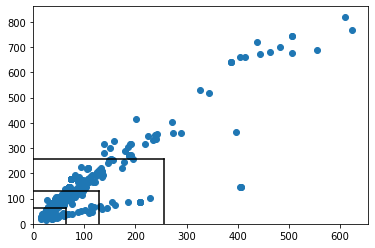

In [4]:
small_size = 64 # original value 32 from TF API
medium_size = 128 # original value 96 from TF API
large_size = 256

plt.scatter((df["xmax"]-df["xmin"]),(df["ymax"]-df["ymin"]))

def box(size,color):
  plt.plot([0,size], [size, size], color)
  plt.plot([size,size], [0, size], color)  

box(small_size,"k")
box(medium_size,"k") 
box(large_size,"k") 

plt.xlim(0)
plt.ylim(0)

print(np.min(df["xmax"]-df["xmin"]))
print(np.min(df["ymax"]-df["ymin"]))
print(np.min(df["xmin"]))
print(np.min(df["ymin"]))
print(np.max(df["xmax"]))
print(np.max(df["ymax"]))

In [5]:
issmall = ((df["xmax"]-df["xmin"]) <= small_size) & ((df["ymax"]-df["ymin"]) <= small_size)
small_image = df[issmall]
print(issmall)
print(type(issmall))
print(small_image)

0       True
1      False
2       True
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool
<class 'pandas.core.series.Series'>
                                              filename  xmin  ...  ymax  class
0    RecFile_1_20181011_153137_pointgrey_flycapture...   875  ...   546      A
2    RecFile_7_20180111_100948_pointgrey_flycapture...  1411  ...   640      A
8    RecFile_1_20190124_101053_pointgrey_flycapture...  1581  ...   694      C
12   RecFile_7_20171109_114505_pointgrey_flycapture...  1367  ...   731      C
16   RecFile_1_20190124_101053_pointgrey_flycapture...   835  ...   701      F
..                                                 ...   ...  ...   ...    ...
481  RecFile_1_20181115_092825_pointgrey_flycapture...   903  ...   842    ID3
484  RecFile_5_20180705_094048_pointgrey_flycapture...  1255  ...   714    ID3
488  RecFile_5_20180705_094048_pointgrey_flycapture...  1061  ...   853      F
489  R

In [6]:
ismedium = (((df["xmax"]-df["xmin"]) > small_size) | ((df["ymax"]-df["ymin"]) > small_size)) & ((df["xmax"]-df["xmin"]) <= medium_size) & ((df["ymax"]-df["ymin"]) <= medium_size)
medium_image = df[ismedium]
print(ismedium)
print(medium_image)

0      False
1       True
2      False
3       True
4      False
       ...  
495    False
496    False
497    False
498    False
499     True
Length: 500, dtype: bool
                                              filename  xmin  ...  ymax  class
1    RecFile_1_20190124_111149_pointgrey_flycapture...   807  ...   370    ID3
3    RecFile_1_20190124_112608_pointgrey_flycapture...  1152  ...  1257      C
14   RecFile_5_20180705_131333_pointgrey_flycapture...  1277  ...   827      H
18   RecFile_3_20180606_104429_pointgrey_flycapture...   445  ...   431      H
22   RecFile_1_20190124_135313_pointgrey_flycapture...   123  ...   617      A
..                                                 ...   ...  ...   ...    ...
485  RecFile_1_20190124_135313_pointgrey_flycapture...    85  ...   512      H
490  RecFile_1_20190124_135313_pointgrey_flycapture...   436  ...   561      H
492  RecFile_5_20180705_094048_pointgrey_flycapture...   925  ...   747      H
494  RecFile_1_20190124_112608_pointgrey_f

In [7]:
islarge = (((df["xmax"]-df["xmin"]) > medium_size) | ((df["ymax"]-df["ymin"]) > medium_size)) & ((df["xmax"]-df["xmin"]) <= large_size) & ((df["ymax"]-df["ymin"]) <= large_size)
large_image = df[islarge]
print(islarge)
print(large_image)

0      False
1      False
2      False
3      False
4       True
       ...  
495    False
496     True
497     True
498     True
499    False
Length: 500, dtype: bool
                                              filename  xmin  ...  ymax  class
4    RecFile_7_20171109_114509_pointgrey_flycapture...   711  ...    96      C
6    RecFile_7_20171109_114509_pointgrey_flycapture...   711  ...    96      C
7    RecFile_7_20180111_100948_pointgrey_flycapture...   200  ...   494      C
9    RecFile_7_20180111_100948_pointgrey_flycapture...   799  ...    77    ID3
10   RecFile_3_20180606_104429_pointgrey_flycapture...   475  ...   193    ID3
..                                                 ...   ...  ...   ...    ...
487  RecFile_7_20180111_100948_pointgrey_flycapture...   200  ...   494      C
491  RecFile_1_20190124_135313_pointgrey_flycapture...   583  ...   395      C
496  RecFile_7_20171109_114509_pointgrey_flycapture...   709  ...    97      C
497  RecFile_1_20190124_101053_pointgrey_f

In [8]:
ishuge = ((df["xmax"]-df["xmin"]) > large_size) | ((df["ymax"]-df["ymin"]) > large_size)
huge_image = df[ishuge]
print(ishuge)
print(huge_image)

0      False
1      False
2      False
3      False
4      False
       ...  
495     True
496    False
497    False
498    False
499    False
Length: 500, dtype: bool
                                              filename  xmin  ...  ymax  class
5    RecFile_1_20190124_135241_pointgrey_flycapture...  1563  ...   661      H
15   RecFile_1_20190124_112608_pointgrey_flycapture...  1170  ...  1041      H
19   RecFile_3_20180913_171849_pointgrey_flycapture...   374  ...   684      F
21   RecFile_5_20180705_131333_pointgrey_flycapture...   230  ...   162      A
27   RecFile_1_20181115_132213_pointgrey_flycapture...   -69  ...  1013      H
28   RecFile_1_20190124_112608_pointgrey_flycapture...   847  ...  1302      H
34   RecFile_1_20190124_101053_pointgrey_flycapture...   126  ...    72      H
39   RecFile_5_20180705_131333_pointgrey_flycapture...   -46  ...   593      H
73   RecFile_1_20190124_135241_pointgrey_flycapture...   582  ...   626      A
75   RecFile_1_20190124_135241_pointgrey_f

In [9]:
for index, row in small_image.iterrows():
  img = cv2.imread(root_path+"/image_dataset/images/"+row["filename"])
  #print(row["filename"])
  #print(type(img))

  if row["ymin"] < 0:
    low_y = 0
  else:
    low_y = row["ymin"] 
  if row["xmin"] < 0:
    low_x = 0
  else:
    low_x = row["xmin"]

  crop_img = img[low_y:low_y+small_size, low_x:low_x+small_size].copy()

  if not os.path.isdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"])):
    os.mkdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"]))

  cv2.imwrite(root_path+"/cropped_images/"+row["filename"],crop_img)


In [10]:
for index, row in medium_image.iterrows():
  img = cv2.imread(root_path+"/image_dataset/images/"+row["filename"])

  if row["ymin"] < 0:
    low_y = 0
  else:
    low_y = row["ymin"] 
  if row["xmin"] < 0:
    low_x = 0
  else:
    low_x = row["xmin"]

  crop_img = img[low_y:low_y+medium_size, low_x:low_x+medium_size].copy()

  if not os.path.isdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"])):
    os.mkdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"]))

  cv2.imwrite(root_path+"/cropped_images/"+row["filename"],crop_img)

In [11]:
for index, row in large_image.iterrows():
  img = cv2.imread(root_path+"/image_dataset/images/"+row["filename"])

  if row["ymin"] < 0:
    low_y = 0
  else:
    low_y = row["ymin"] 
  if row["xmin"] < 0:
    low_x = 0
  else:
    low_x = row["xmin"]

  crop_img = img[low_y:low_y+large_size, low_x:low_x+large_size].copy()

  if not os.path.isdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"])):
    os.mkdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"]))

  cv2.imwrite(root_path+"/cropped_images/"+row["filename"],crop_img)

In [12]:
for index, row in huge_image.iterrows():
  img = cv2.imread(root_path+"/image_dataset/images/"+row["filename"])

  if not os.path.isdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"])):
    os.mkdir(root_path+"/cropped_images/"+os.path.dirname(row["filename"]))

  cv2.imwrite(root_path+"/cropped_images/"+row["filename"],img)

In [13]:
small_image.to_csv(root_path+"/cropped_images/"+"small_images_{}.csv".format(choose_csv),index=False)
medium_image.to_csv(root_path+"/cropped_images/"+"medium_images_{}.csv".format(choose_csv),index=False)
large_image.to_csv(root_path+"/cropped_images/"+"large_images_{}.csv".format(choose_csv),index=False)
huge_image.to_csv(root_path+"/cropped_images/"+"huge_images_{}.csv".format(choose_csv),index=False)